In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
np.random.seed(42)
# metrics
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

# preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# models 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import IsolationForest

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [3]:
# getting the data
df = pd.read_csv('data/mfeat-morphological_csv.csv')
df.head()

att1  att2  att3        att4      att5         att6  class
0   1.0   0.0   0.0  133.150861  1.311693  1620.221779      1
1   1.0   0.0   0.0  126.724861  1.302745  1609.334822      1
2   1.0   0.0   0.0  131.173861  1.319031  1568.978435      1
3   1.0   0.0   0.0  129.478861  1.270878  1695.055281      1
4   1.0   0.0   0.0  127.262861  1.329637  1647.720235      1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   att1    2000 non-null   float64
 1   att2    2000 non-null   float64
 2   att3    2000 non-null   float64
 3   att4    2000 non-null   float64
 4   att5    2000 non-null   float64
 5   att6    2000 non-null   float64
 6   class   2000 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 109.5 KB


In [5]:
df.describe()

att1         att2         att3         att4         att5  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.492500     1.733500     0.713500   156.418886     1.639569   
std       0.664955     1.141985     0.699759    25.010014     0.291316   
min       0.000000     0.000000     0.000000    99.508861     1.143130   
25%       0.000000     1.000000     0.000000   135.014361     1.363562   
50%       0.000000     2.000000     1.000000   150.063861     1.625846   
75%       1.000000     3.000000     1.000000   175.728861     1.881523   
max       2.000000     6.000000     5.000000   231.276861     2.558830   

               att6     class  
count   2000.000000  2000.000  
mean    6155.200435     5.500  
std     3757.634467     2.873  
min     1439.534940     1.000  
25%     3099.331040     3.000  
50%     5255.432237     5.500  
75%     9093.955756     8.000  
max    17572.199943    10.000

**No missing values**

In [6]:
y = df['class']
x = df.iloc[:, :-1]
x.columns

Index(['att1', 'att2', 'att3', 'att4', 'att5', 'att6'], dtype='object')

In [28]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2)

In [8]:
rf = RandomForestClassifier(oob_score=True, random_state=42)
rf.fit(x_train, y_train)
rf.oob_score_

0.708125

In [9]:
rf.score(x_valid, y_valid)

0.7075

In [10]:
rf = RandomForestClassifier(n_estimators=40, max_features=0.5, oob_score=True, n_jobs=-1, random_state=42)
rf.fit(x_train, y_train)
rf.oob_score_

0.690625

In [11]:
rf.score(x_valid, y_valid)

0.715

In [12]:
balanced_accuracy_score(y_valid, rf.predict(x_valid))

0.6974362132232704

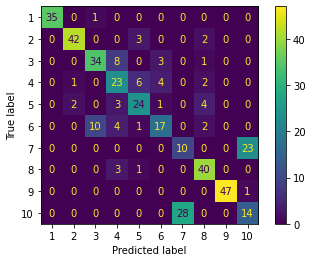

In [13]:
plot_confusion_matrix(rf, x_valid, y_valid);

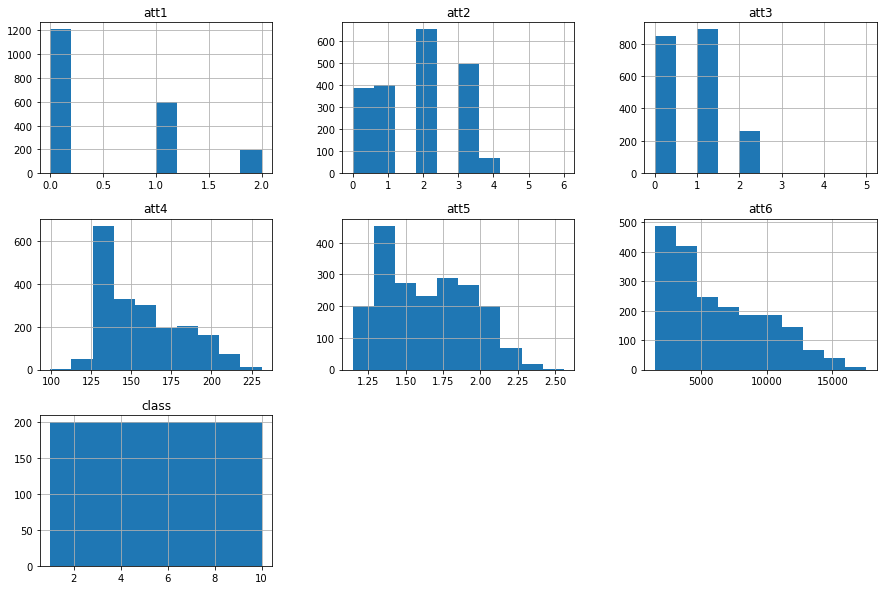

In [14]:
df.hist(figsize=(15, 10));

In [15]:
columns = df.columns.tolist();columns

['att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'class']

In [16]:
np.r_[columns[:3], [columns[4]]].tolist()

['att1', 'att2', 'att3', 'att5']

<AxesSubplot:>

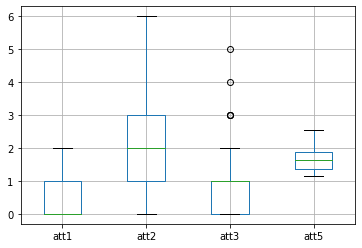

In [17]:
df.boxplot(np.r_[columns[:3], [columns[4]]].tolist())

<AxesSubplot:>

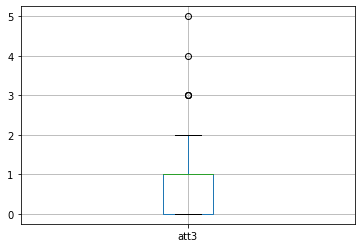

In [18]:
df.boxplot('att3')

In [19]:
df['att3'].value_counts()

1.0    889
0.0    846
2.0    260
3.0      3
5.0      1
4.0      1
Name: att3, dtype: int64

In [20]:
df[ df['att3'] >= 3]

att1  att2  att3        att4      att5         att6  class
235    0.0   4.0   4.0  155.074861  1.512981  4419.579881      2
327    0.0   3.0   5.0  150.543861  1.601697  4951.456401      2
819    1.0   3.0   3.0  146.863861  1.549377  4952.085367      5
1739   2.0   1.0   3.0  128.668861  1.269088  1728.209448      9
1783   2.0   1.0   3.0  141.726861  1.376182  2574.034752      9

<AxesSubplot:>

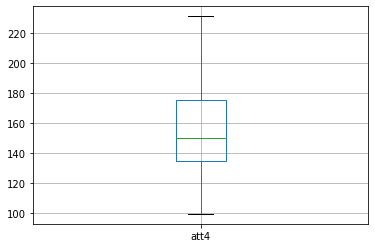

In [21]:
df.boxplot('att4')

<AxesSubplot:>

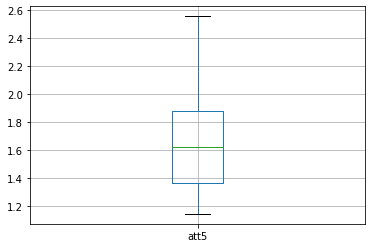

In [22]:
df.boxplot('att5')

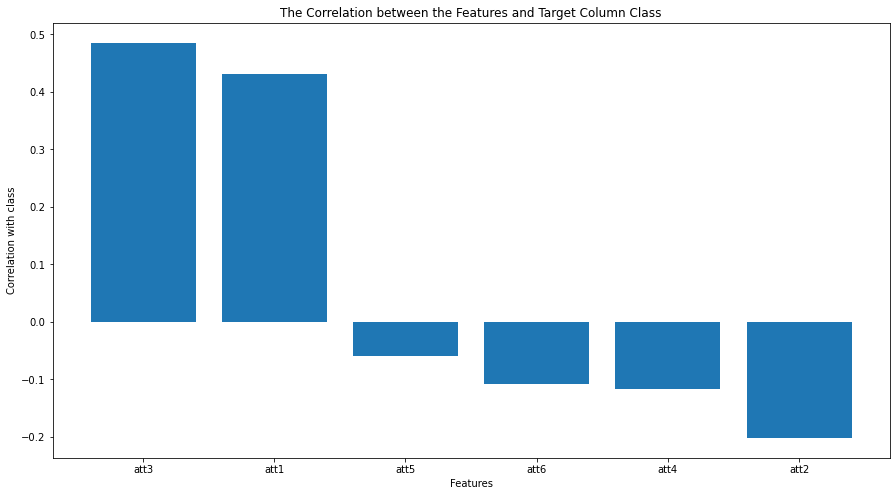

In [23]:
# correlation 
corr = pd.DataFrame(df.corr()['class'].sort_values(ascending=False)[1:])

labels = corr.index
corr_values = corr['class'].tolist()

plt.figure(figsize=(15, 8))
plt.bar(labels, corr_values)
plt.xlabel('Features')
plt.ylabel('Correlation with class')
plt.title('The Correlation between the Features and Target Column Class')
plt.show()

In [36]:
rf_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('rf', RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42))
])

In [37]:
rf_pipe.fit(x_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(n_jobs=-1, oob_score=True,
                                        random_state=42))])

In [38]:
rf_pipe.score(x_valid, y_valid)

0.73

### Modeling

In [39]:
# helper functions for RandomForests
# puts the feature importance of RandomForest in a DataFrame
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns[:-1], 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

# Plots the feature importance using the DataFrame
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

In [40]:
# fit_model
# takes a model and datasets as input and outputs the scores
def fit_model(model, x_train, y_train, x_valid, y_valid, return_scores=False):
    # fitting the model
    model.fit(x_train, y_train)
    
    # Scores
    train_score = model.score(x_train, y_train)
    y_pred = model.predict(x_valid)
    valid_score = accuracy_score(y_pred, y_valid)
    conf_mx = confusion_matrix(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred, average='weighted')
    recall = recall_score(y_valid, y_pred, average='weighted')
    f1 = f1_score(y_valid, y_pred, average='weighted')
    balanced = balanced_accuracy_score(y_valid, y_pred)

    if return_scores:
        return train_score, valid_score, balanced, precision, recall, f1
    
    print('----- Model Scores -----')
    print(f"train score: {train_score:.4f} | valid score: {valid_score:.4f}")
    print(f"precision  : {precision:.4f} | recall     : {recall:.4f}")
    print(f"f1 score   : {f1:.4f} | balanced   : {balanced:.4f}")
    plot_confusion_matrix(model, x_valid, y_valid,
                         values_format='')


    return model

### models 

----- Model Scores -----
train score: 0.9537 | valid score: 0.7300
precision  : 0.7333 | recall     : 0.7300
f1 score   : 0.7289 | balanced   : 0.7162


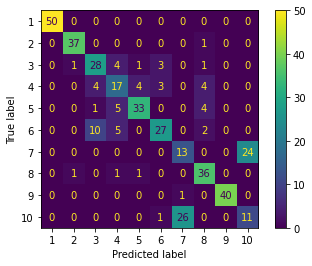

In [41]:
# rf
rf_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('rf', RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42))
])
rf_pipe = fit_model(rf_pipe, x_train, y_train, x_valid, y_valid)

In [42]:
fi = rf_feat_importance(rf, df)
fi

cols       imp
5  att6  0.271560
4  att5  0.190128
3  att4  0.183200
1  att2  0.136194
2  att3  0.121388
0  att1  0.097530

<AxesSubplot:ylabel='cols'>

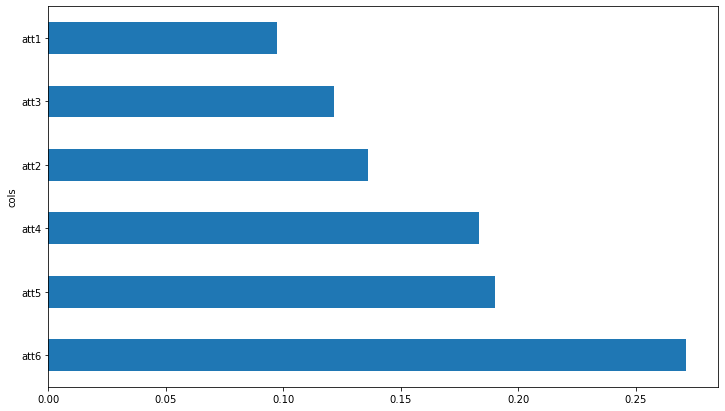

In [43]:
plot_fi(fi)

----- Model Scores -----
train score: 0.7250 | valid score: 0.7450
precision  : 0.7605 | recall     : 0.7450
f1 score   : 0.7439 | balanced   : 0.7352


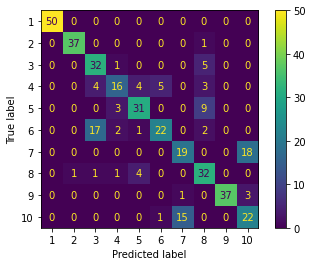

In [45]:
# SVM
svc_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('svc', SVC())
])
svc_pipe = fit_model(svc_pipe, x_train, y_train, x_valid, y_valid)

----- Model Scores -----
train score: 0.7994 | valid score: 0.7350
precision  : 0.7397 | recall     : 0.7350
f1 score   : 0.7346 | balanced   : 0.7207


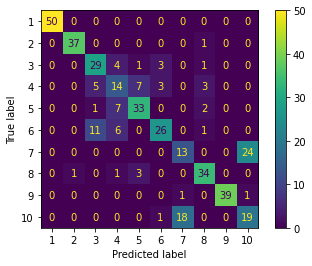

In [46]:
# KNN
knn_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
knn_pipe = fit_model(knn_pipe, x_train, y_train, x_valid, y_valid)

----- Model Scores -----
train score: 0.7475 | valid score: 0.7625
precision  : 0.7718 | recall     : 0.7625
f1 score   : 0.7629 | balanced   : 0.7513


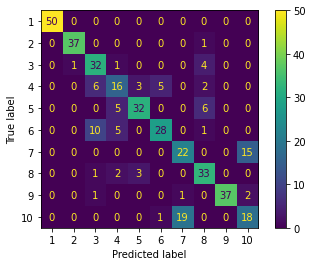

In [48]:
# LR
lr_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])
lr_pipe = fit_model(lr_pipe, x_train, y_train, x_valid, y_valid)

### Outlier detector 

In [73]:
x,y = df.iloc[:, :-1], df['class']

In [95]:
# detecting outliers using IsolationForest
outlierDetector =  IsolationForest(n_estimators=100,random_state = 42, contamination=0.1)
result = outlierDetector.fit_predict(x)
outliers = df[result==-1]

In [96]:
outliers.shape

(200, 7)

In [97]:
new_df = df.drop(outliers.index, axis=0)
x,y = new_df.iloc[:, :-1], new_df['class']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

----- Model Scores -----
train score: 0.7340 | valid score: 0.7389
precision  : 0.7282 | recall     : 0.7389
f1 score   : 0.7066 | balanced   : 0.7440


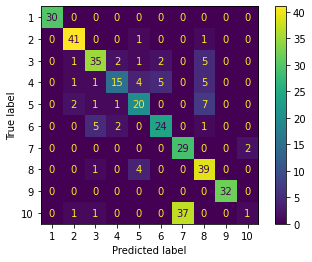

In [98]:
# LR
lr_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])
lr_pipe = fit_model(lr_pipe, x_train, y_train, x_valid, y_valid)

In [99]:
x,y = df.iloc[:, :-1], df['class']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

----- Model Scores -----
train score: 0.7500 | valid score: 0.7500
precision  : 0.8146 | recall     : 0.7500
f1 score   : 0.7237 | balanced   : 0.7462


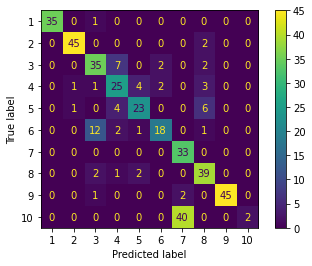

In [103]:
# LR
lr_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])
lr_pipe = fit_model(lr_pipe, x_train, y_train, x_valid, y_valid)

#### Removing some features 

In [52]:
# removing the feature with least importance based on Random Forest
new_df = df.drop('att3', axis=1)
x, y = new_df.iloc[:, :-1], new_df['class']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

----- Model Scores -----
train score: 0.7506 | valid score: 0.7500
precision  : 0.8128 | recall     : 0.7500
f1 score   : 0.7263 | balanced   : 0.7465


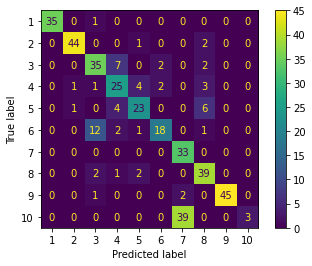

In [53]:
# LR
lr_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])
lr_pipe = fit_model(lr_pipe, x_train, y_train, x_valid, y_valid)

In [51]:
# removing the feature with least importance based on Random Forest
new_df = df.drop('att5', axis=1)
x, y = new_df.iloc[:, :-1], df['class']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

----- Model Scores -----
train score: 0.7506 | valid score: 0.7500
precision  : 0.8128 | recall     : 0.7500
f1 score   : 0.7263 | balanced   : 0.7465


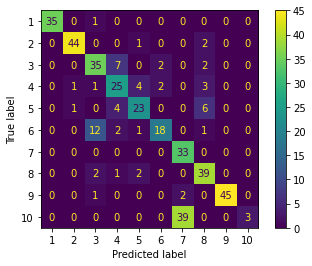

In [54]:
# LR
lr_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])
lr_pipe = fit_model(lr_pipe, x_train, y_train, x_valid, y_valid)

In [56]:
# removing the feature with least importance based on Random Forest
new_df = df.drop(['att5', 'att3'], axis=1)
x, y = new_df.iloc[:, :-1], df['class']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

----- Model Scores -----
train score: 0.7194 | valid score: 0.7325
precision  : 0.7927 | recall     : 0.7325
f1 score   : 0.7119 | balanced   : 0.7307


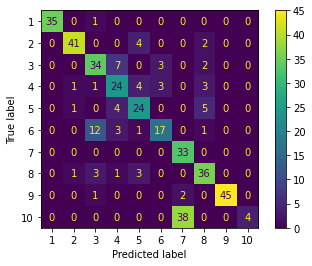

In [57]:
# LR
lr_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])
lr_pipe = fit_model(lr_pipe, x_train, y_train, x_valid, y_valid)

In [58]:
# removing the feature with least importance based on Random Forest
new_df = df.drop(['att6'], axis=1)
x, y = new_df.iloc[:, :-1], df['class']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

----- Model Scores -----
train score: 0.6950 | valid score: 0.7250
precision  : 0.7885 | recall     : 0.7250
f1 score   : 0.6965 | balanced   : 0.7220


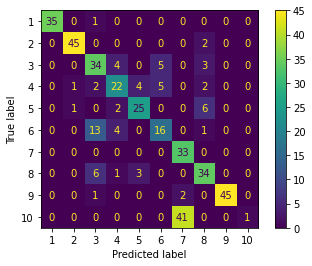

In [59]:
# LR
lr_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])
lr_pipe = fit_model(lr_pipe, x_train, y_train, x_valid, y_valid)

### PCA

----- Model Scores -----
train score: 0.6850 | valid score: 0.7250
precision  : 0.7862 | recall     : 0.7250
f1 score   : 0.6985 | balanced   : 0.7208


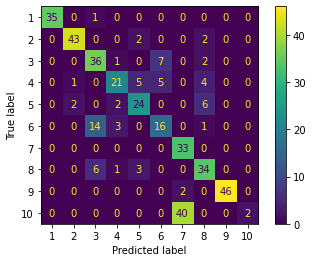

In [64]:
pca_pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('pca', PCA(n_components=.95, whiten=True, random_state=42)),
  ('rf', LogisticRegression(random_state=42, n_jobs=-1))
])

pca_pipe = fit_model(pca_pipe, x_train, y_train, x_valid, y_valid)

----- Model Scores -----
train score: 0.6737 | valid score: 0.7175
precision  : 0.7186 | recall     : 0.7175
f1 score   : 0.6967 | balanced   : 0.7116


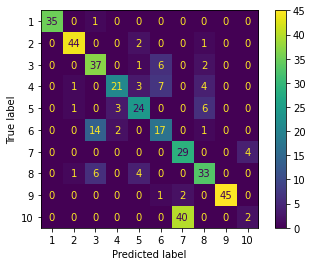

In [71]:
pca_pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('pca', KernelPCA(n_components=4, kernel='rbf', random_state=42)),
  ('rf', LogisticRegression(random_state=42, n_jobs=-1))
])

pca_pipe = fit_model(pca_pipe, x_train, y_train, x_valid, y_valid)

----- Model Scores -----
train score: 0.6825 | valid score: 0.7225
precision  : 0.7342 | recall     : 0.7225
f1 score   : 0.6944 | balanced   : 0.7179


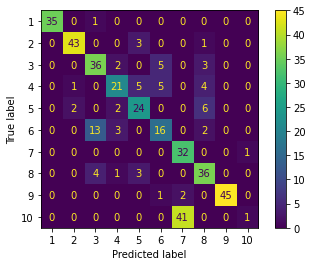

In [72]:
pca_pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('pca', KernelPCA(n_components=4, kernel='poly', random_state=42)),
  ('rf', LogisticRegression(random_state=42, n_jobs=-1))
])

pca_pipe = fit_model(pca_pipe, x_train, y_train, x_valid, y_valid)

# Finetune models  

In [106]:
# split the data
x, y = df.iloc[:, :-1], df['class']
x_train, x_valid , y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)
(x_train.shape, y_train.shape), (x_valid.shape, y_valid.shape)

(((1600, 6), (1600,)), ((400, 6), (400,)))

In [113]:
# RF
n_estimators = [int(x) for x in np.linspace(start=10, stop=150, num=10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   17.1s finished


----- Model Scores -----
train score: 0.8337 | valid score: 0.7375
precision  : 0.7397 | recall     : 0.7375
f1 score   : 0.7329 | balanced   : 0.7266


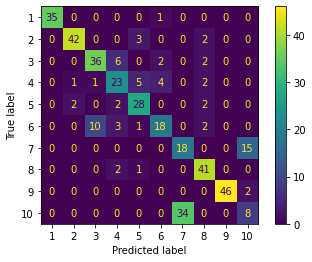

In [114]:
rf_pipeline = Pipeline([
  ('scaler', StandardScaler()),
  ('random_rf', RandomizedSearchCV(estimator = RandomForestClassifier(random_state=42, n_jobs=-1), param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1))
])


rf_pipeline = fit_model(rf_pipeline, x_train, y_train, x_valid, y_valid)

In [115]:
rf_pipeline['random_rf'].best_params_

{'n_estimators': 87,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   19.9s finished


----- Model Scores -----
train score: 0.7544 | valid score: 0.7475
precision  : 0.7098 | recall     : 0.7475
f1 score   : 0.7157 | balanced   : 0.7441


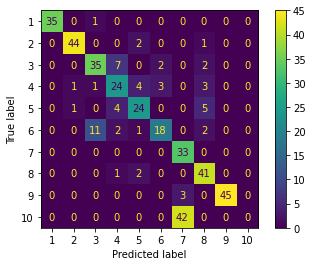

In [118]:
# SVC
param_grid = {'C': np.arange(1, 11), 'gamma': [1,0.1,0.01,0.001],'kernel': ['poly', 'sigmoid', 'linear', 'sigmoid']}

svc_pipeline = Pipeline([
  ('scaler', StandardScaler()),
  ('random_svc', RandomizedSearchCV(estimator = SVC(), param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1))
])


svc_pipeline = fit_model(svc_pipeline, x_train, y_train, x_valid, y_valid)

In [120]:
svc_pipeline['random_svc'].best_params_

{'kernel': 'linear', 'gamma': 1, 'C': 5}

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    4.0s finished


----- Model Scores -----
train score: 0.8063 | valid score: 0.7300
precision  : 0.7380 | recall     : 0.7300
f1 score   : 0.7249 | balanced   : 0.7181


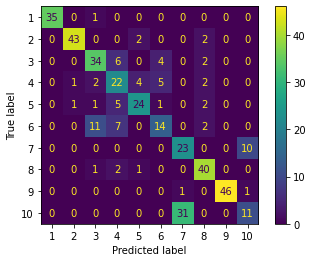

In [122]:
# KNN
param_grid = {'n_neighbors':[4,5,6,7],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree']}

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('random_knn', RandomizedSearchCV(estimator = KNeighborsClassifier(), param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1))
])    

knn_pipeline = fit_model(knn_pipeline, x_train, y_train, x_valid, y_valid)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    3.4s finished


----- Model Scores -----
train score: 0.7575 | valid score: 0.7525
precision  : 0.7730 | recall     : 0.7525
f1 score   : 0.7382 | balanced   : 0.7465


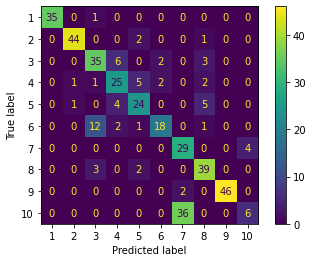

In [123]:
# LR
param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('random_lr', RandomizedSearchCV(estimator = LogisticRegression(random_state=42, n_jobs=-1), param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1))
])    


lr_pipeline = fit_model(lr_pipeline, x_train, y_train, x_valid, y_valid)

- [ ] put a table of the results

In [ ]:
# retrain models with the best parameters
rf = RandomForestClassifier(**rf_pipeline['random_rf'].best_params_, oob_score=True, random_state=42, n_jobs=-1)
rf.fit(x_train, y_train)

knn = KNeighborsClassifier(**knn_pipeline['random_knn'].best_params_)
knn.fit(x_train, y_train)

svc = SVC(**svc_pipeline['random_svc'].best_params_, probability=True)
svc.fit(x_train, y_train)

lr = LogisticRegression(**lr_rand['random_rf'].best_params_)
lr.fit(x_train, y_train)

models = [rf, knn, svc, lr]

In [125]:
for m in models:
    print(type(m).__name__, ':', m.score(x_valid, y_valid))

NameError: name 'models' is not defined

----- Model Scores -----
train score: 0.7819 | valid score: 0.7650
precision  : 0.7910 | recall     : 0.7650
f1 score   : 0.7432 | balanced   : 0.7610


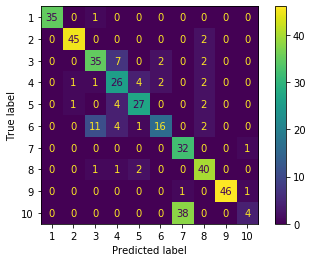

In [123]:
voting_clf = VotingClassifier(
    estimators=[('RF', rf), ('KNN', knn), ('SVC', svc), ('LR', lr)],
    voting='hard'
)

voting_clf = fit_model(voting_clf, x_train, y_train, x_valid, y_valid)

----- Model Scores -----
train score: 0.8200 | valid score: 0.7400
precision  : 0.7462 | recall     : 0.7400
f1 score   : 0.7363 | balanced   : 0.7289


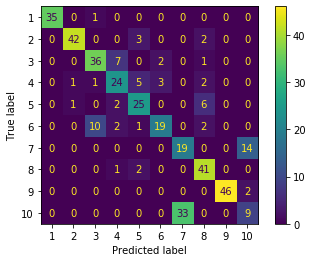

In [124]:
voting_clf = VotingClassifier(
    estimators=[('RF', rf), ('KNN', knn), ('SVC', svc), ('LR', lr)],
    voting='soft'
)

voting_clf = fit_model(voting_clf, x_train, y_train, x_valid, y_valid)

----- Model Scores -----
train score: 0.7969 | valid score: 0.7475
precision  : 0.7520 | recall     : 0.7475
f1 score   : 0.7364 | balanced   : 0.7390


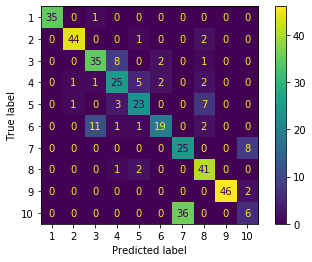

In [125]:
# drop the rf classifier
voting_clf = VotingClassifier(
    estimators=[('KNN', knn), ('SVC', svc), ('LR', lr)],
    voting='soft'
)

voting_clf = fit_model(voting_clf, x_train, y_train, x_valid, y_valid)

----- Model Scores -----
train score: 0.7769 | valid score: 0.7575
precision  : 0.7844 | recall     : 0.7575
f1 score   : 0.7361 | balanced   : 0.7521


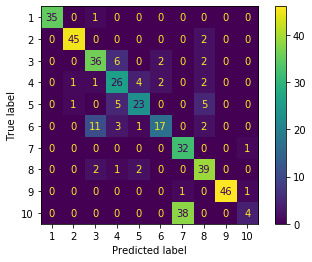

In [126]:
# drop the rf classifier
voting_clf = VotingClassifier(
    estimators=[('KNN', knn), ('SVC', svc), ('LR', lr)],
    voting='hard'
)

voting_clf = fit_model(voting_clf, x_train, y_train, x_valid, y_valid)

### Bagging and Pasting using the best model 

In [127]:
bag_clf = BaggingClassifier(SVC(**svc_random.best_params_, probability=True), n_estimators=150, 
                           max_samples=1000, bootstrap=True, n_jobs=-1, random_state=42, oob_score=True)
bag_clf.fit(x_train, y_train)
bag_clf.score(x_valid, y_valid)

0.7525

In [128]:
bag_clf = BaggingClassifier(SVC(**svc_random.best_params_, probability=True), n_estimators=150, 
                           max_samples=1000, max_features=3, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(x_train, y_train)
bag_clf.score(x_valid, y_valid)

0.7275

In [129]:
bag_clf = BaggingClassifier(SVC(**svc_random.best_params_, probability=True), n_estimators=150, 
                           max_samples=1000, bootstrap=False, random_state=42, n_jobs=-1)
bag_clf.fit(x_train, y_train)
bag_clf.score(x_valid, y_valid)

0.77

**best results**

### bias & Variance

In [130]:
svc_random.best_params_

{'kernel': 'poly', 'gamma': 1, 'C': 5}

In [131]:
svc_grid = SVC(gamma=1, C=5)
svc_param = {'kernel': ['sigmoid', 'poly', 'linear', 'rbf']}
svc_grid = GridSearchCV(svc_grid, svc_param, n_jobs=-1, verbose=2, cv=3)
svc_grid.fit(x_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=5, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=1,
                           kernel='rbf', max_iter=-1, probability=False,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'kernel': ['sigmoid', 'poly', 'linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [132]:
svc_grid.best_params_

{'kernel': 'poly'}

In [133]:
svc_grid.score(x_valid, y_valid)

0.7675

In [134]:
svc_results = pd.DataFrame(svc_grid.cv_results_);
svc_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_kernel  \
0       0.053142      0.003839         0.047817        0.002021      sigmoid   
1       0.147129      0.015150         0.007170        0.000886         poly   
2       0.026018      0.009571         0.016564        0.012521       linear   
3       0.032713      0.013679         0.010514        0.002022          rbf   

                  params  split0_test_score  split1_test_score  \
0  {'kernel': 'sigmoid'}           0.226592           0.288931   
1     {'kernel': 'poly'}           0.749064           0.754221   
2   {'kernel': 'linear'}           0.747191           0.746717   
3      {'kernel': 'rbf'}           0.741573           0.748593   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.121951         0.212491        0.068894                4  
1           0.759850         0.754378        0.004405                1  
2           0.756098         0.750002        0.004315                2  
3           0.746717         0.745628        0.002968                3

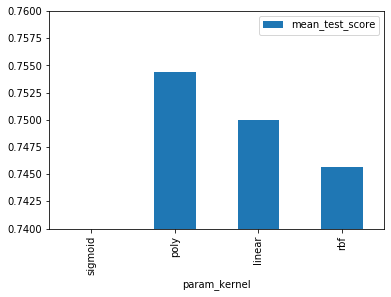

Kernel sigmoid : 0.2124911871417763
Kernel poly : 0.7543783216570281
Kernel linear : 0.7500017567159251
Kernel rbf : 0.7456275340627219


In [135]:
svc_results.plot(kind='bar', x='param_kernel', y='mean_test_score')
plt.ylim(0.74, 0.76)
plt.show()
for i in range(4):
    print(f"Kernel {svc_results['param_kernel'][i]} : {svc_results['mean_test_score'][i]}")

The sigmoid kernel has a really high bias as it made wrong assumption about the data and it is really underfitting.

For the rest of the kernels they are producing similar results

In [161]:
svc_grid = SVC(gamma=1, kernel='poly',C=10)
svc_param = {'C': np.arange(1, 35)}
svc_grid = GridSearchCV(svc_grid, svc_param, n_jobs=-1, verbose=2, cv=3)
svc_grid.fit(x_train, y_train)

Fitting 3 folds for each of 34 candidates, totalling 102 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:   10.4s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=10, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=1,
                           kernel='poly', max_iter=-1, probability=False,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [162]:
svc_grid.best_params_

{'C': 5}

In [163]:
svc_results = pd.DataFrame(svc_grid.cv_results_); svc_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.085385      0.013505         0.014345        0.002735       1   
1       0.097826      0.017552         0.009813        0.000667       2   
2       0.135754      0.027730         0.015159        0.004920       3   
3       0.266001      0.097769         0.020586        0.014362       4   
4       0.220349      0.083020         0.014135        0.005827       5   

     params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 1}           0.745318           0.746717           0.739212   
1  {'C': 2}           0.749064           0.744841           0.754221   
2  {'C': 3}           0.750936           0.750469           0.756098   
3  {'C': 4}           0.750936           0.754221           0.756098   
4  {'C': 5}           0.749064           0.754221           0.759850   

   mean_test_score  std_test_score  rank_test_score  
0         0.743749        0.003259               15  
1         0.749375        0.003836                7  
2         0.752501        0.002550                3  
3         0.753752        0.002133                2  
4         0.754378        0.004405                1

(0.73, 0.76)

<Figure size 720x1800 with 0 Axes>

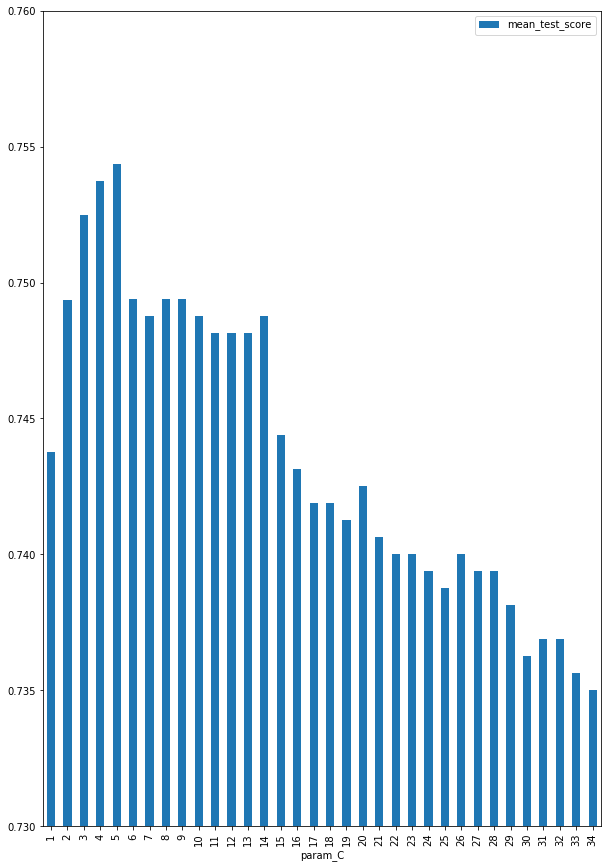

In [164]:
plt.figure(figsize=(10, 25))
svc_results.plot(kind='bar', x='param_C', y='mean_test_score', figsize=(10, 15))
plt.ylim(0.73, 0.76)

At small regularization C values the the variance of the model was high and it was sensitive to small variations in the data and this variance decreased as we increased the value of C until it reached a specific point at c=5 and where the bias started to increase as the model generalized and decrease the model complexity too much and ignored more points which made it have wrong assumptions about the data. 

###  Pipelines

In [70]:
from sklearn.cluster import KMeans

In [89]:
df.columns

Index(['att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'class'], dtype='object')

In [68]:
# new data without the att3
new_df = df.drop('att3', axis=1)
x, y = new_df.iloc[:, :-1], new_df['class']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

----- Model Scores -----
train score: 0.7006 | valid score: 0.7400
precision  : 0.7533 | recall     : 0.7400
f1 score   : 0.7217 | balanced   : 0.7341


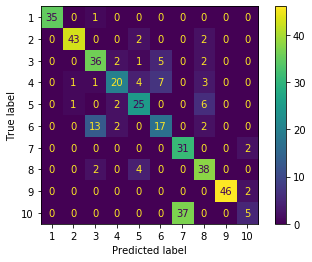

In [74]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('kmeans', KMeans(n_clusters=5)),
    ('svc', SVC(kernel='poly', gamma=1, C=10))
])

pipeline = fit_model(pipeline, x_train, y_train, x_valid, y_valid)

----- Model Scores -----
train score: 0.7831 | valid score: 0.7650
precision  : 0.7857 | recall     : 0.7650
f1 score   : 0.7543 | balanced   : 0.7581


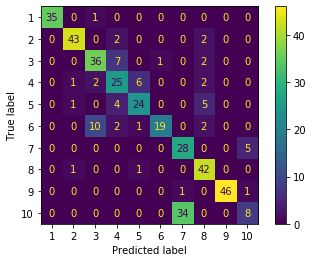

In [76]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(**svc_random.best_params_))
])

pipeline = fit_model(pipeline, x_train, y_train, x_valid, y_valid)

----- Model Scores -----
train score: 0.7831 | valid score: 0.7650
precision  : 0.7857 | recall     : 0.7650
f1 score   : 0.7543 | balanced   : 0.7581


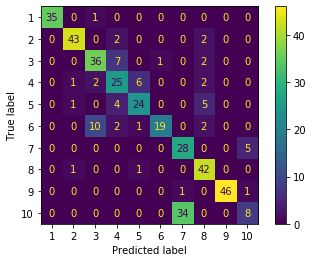

In [75]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(**svc_random.best_params_))
])

pipeline = fit_model(pipeline, x_train, y_train, x_valid, y_valid)